In [5]:
import os
import fnmatch
import re
import matplotlib.pyplot as plt

def find_matching_directories(parent_dir, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(parent_dir):
        for dirname in fnmatch.filter(dirnames, pattern):
            matches.append(os.path.join(root, dirname))
    return matches


def find_send_receive_number_and_receiver_domain(directory):
    last_dir_name = os.path.basename(directory)
    match_send_receive = re.search(r'send_receive_(\d+)', last_dir_name)
    if match_send_receive:
        send_receive_num = match_send_receive.group(1)
    # Pattern to extract number after _receiver_
    match_receiver = re.search(r'_receiver_(\d+)', last_dir_name)
    if match_receiver:
        receiver_num = match_receiver.group(1)
    return send_receive_num,receiver_num


def throughput_reader(directory,filename):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    matching_files = fnmatch.filter(files, filename)
#     print(matching_files)
    filename_=directory+'/'+matching_files[0]
#     print(filename_)
    with open(filename_, 'r') as file:
        # Read the lines of the file
        lines = file.readlines()
        mean_network_throughput_mbps=[]
        mean_end_to_end_throughput=[]
        for line in lines:
            if "mean Network throughput" in line:
                # Split the line into words
                words = line.split()
                # The last word in the line is the numerical value we want
                throughput = words[-2]
#                 print(throughput)
                # Check if the value is in Mb/s
                if "Mb/s" in line:
                    # Convert the string to a float and assign it to a variable
#                     print("Network ",throughput)
                    mean_network_throughput_mbps.append(float(throughput)/1000)
            if "Decompressed mean throughput" in line:
                # Split the line into words
                words = line.split()
                # The last word in the line is the numerical value we want
                throughput = words[-2]
#                 print(throughput)
                # Check if the value is in Mb/s
                if "Mb/s" in line:
                    # Convert the string to a float and assign it to a variable
#                     print("Decompressed ",throughput)
                    mean_end_to_end_throughput.append(float(throughput)/1000)
    
    return sum(mean_network_throughput_mbps) / len(mean_network_throughput_mbps),sum(mean_end_to_end_throughput) / len(mean_end_to_end_throughput)


def plot_dictionary(data,titleName,compressor_thread,decompressor_thread):
    xticks_labels = ["N_2", "N_4", "N_8"]
    domain_0_values = [data[f'c_{compressor_thread}_d_{decompressor_thread}_{label}_domain_0'][1] for label in xticks_labels]
    domain_1_values = [data[f'c_{compressor_thread}_d_{decompressor_thread}_{label}_domain_1'][1] for label in xticks_labels]
    print("domain_0_values",domain_0_values)
    print("domain_1_values",domain_1_values)
    # Bar plotting
    bar_width = 0.35
    index = range(len(xticks_labels))

    fig, ax = plt.subplots(figsize=(12, 8))

    bar1 = ax.bar(index, domain_0_values, bar_width, label='receive_domain_0')
    bar2 = ax.bar([i+bar_width for i in index], domain_1_values, bar_width, label='receive_domain_1')

    # Labeling and other aesthetics
    ax.set_xlabel('N Value')
    ax.set_ylabel('Height')
#     ax.set_title(titleName,fontsize=24,weight = 'bold')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(('2', '4', '8'))
    ax.yaxis.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_ylim(0, 100)
    # Place legend above the highest gridline and set it to one row
    legend = ax.legend(bbox_to_anchor=(0., .92, 1., .92), loc='lower left', ncol=2, mode="expand", borderaxespad=0.,fontsize=16)
    plt.xlabel('Number of sending/receiving threads ', fontsize=24,weight = 'bold')
    plt.ylabel('End-to-End Throughput\n in Gbps', fontsize=18,weight = 'bold')
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.title(titleName,fontsize=24,weight = 'bold')
    # plt.legend(frameon=False)
    legend.get_frame().set_edgecolor("none")

    plt.tight_layout()
    plt.show()


compression_32_decompression_16_*
{'c_32_d_16_N_2_domain_0': (29.4261774, 59.90717440000001), 'c_32_d_16_N_2_domain_1': (30.736208599999998, 62.7872872), 'c_32_d_16_N_4_domain_0': (35.825474, 72.4936742), 'c_32_d_16_N_4_domain_1': (36.3673984, 74.74346260000002), 'c_32_d_16_N_8_domain_0': (31.8169758, 61.3099112), 'c_32_d_16_N_8_domain_1': (47.2377862, 97.06829540000001)}
domain_0_values [59.90717440000001, 72.4936742, 61.3099112]
domain_1_values [62.7872872, 74.74346260000002, 97.06829540000001]


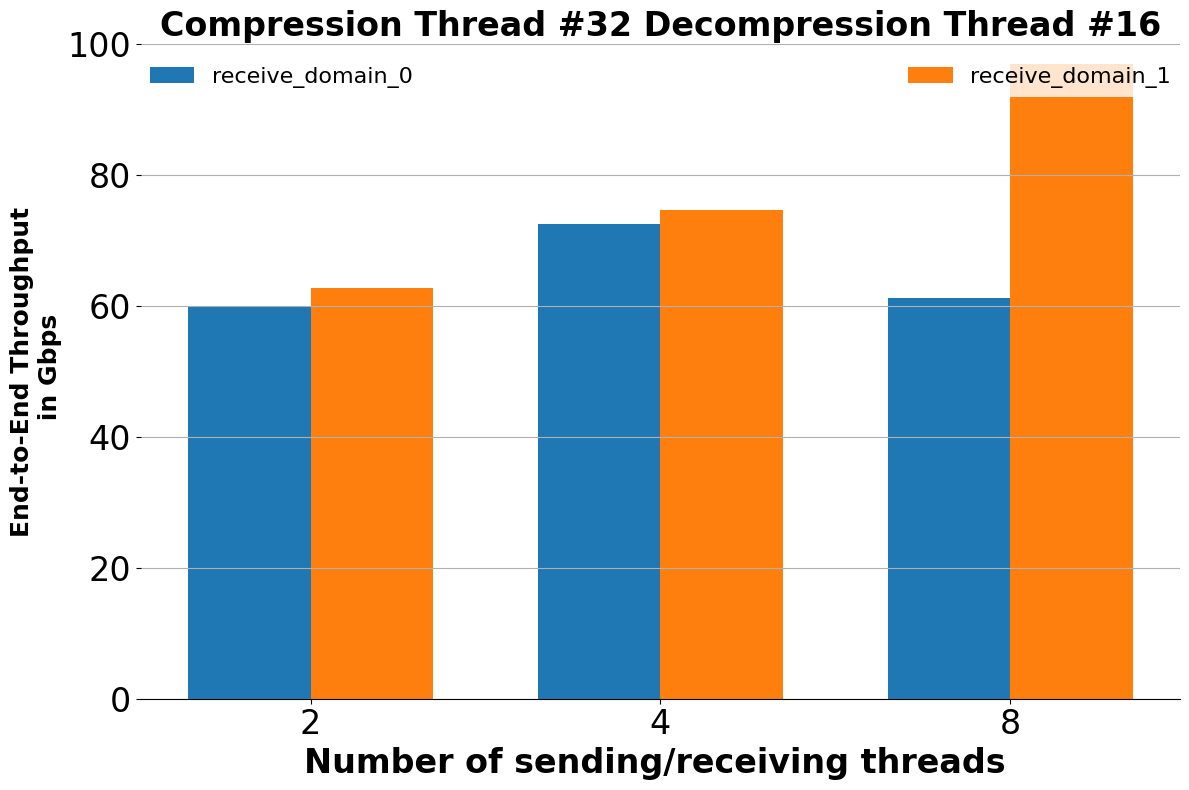

In [15]:
TARGET_COMPRESSION=32
TARGET_DECOMPRESSION=16

selection_filter='compression_'+str(TARGET_COMPRESSION)+"_decompression_"+str(TARGET_DECOMPRESSION)+"_*"
print(selection_filter)
titleName='Compression Thread #'+str(TARGET_COMPRESSION)+" Decompression Thread #"+str(TARGET_DECOMPRESSION)
# selection_filter='compression_'
parent_directory = "/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/End_to_End/"
matching_dirs = find_matching_directories(parent_directory, selection_filter)
# print(matching_dirs)
result_dict1={}
log_file_pattern="_7080*"
for dir_path in matching_dirs:
    tcp_stream,receiver_domain=find_send_receive_number_and_receiver_domain(dir_path)
    key_name="c_"+str(TARGET_COMPRESSION)+"_d_"+str(TARGET_DECOMPRESSION)+"_N_"+str(tcp_stream)+"_domain_"+str(receiver_domain)
    result_dict1[key_name]=throughput_reader(dir_path,log_file_pattern)
print(result_dict1)
plot_dictionary(result_dict1,titleName,TARGET_COMPRESSION,TARGET_DECOMPRESSION)

compression_16_decompression_16_*
{'c_16_d_16_N_2_domain_0': (31.205693599999996, 63.255638999999995), 'c_16_d_16_N_2_domain_1': (32.4223656, 66.6235692), 'c_16_d_16_N_4_domain_0': (32.9427716, 67.7287332), 'c_16_d_16_N_4_domain_1': (33.1072816, 68.2471022), 'c_16_d_16_N_8_domain_0': (32.757542799999996, 67.3708472), 'c_16_d_16_N_8_domain_1': (32.799203399999996, 67.51135120000001)}


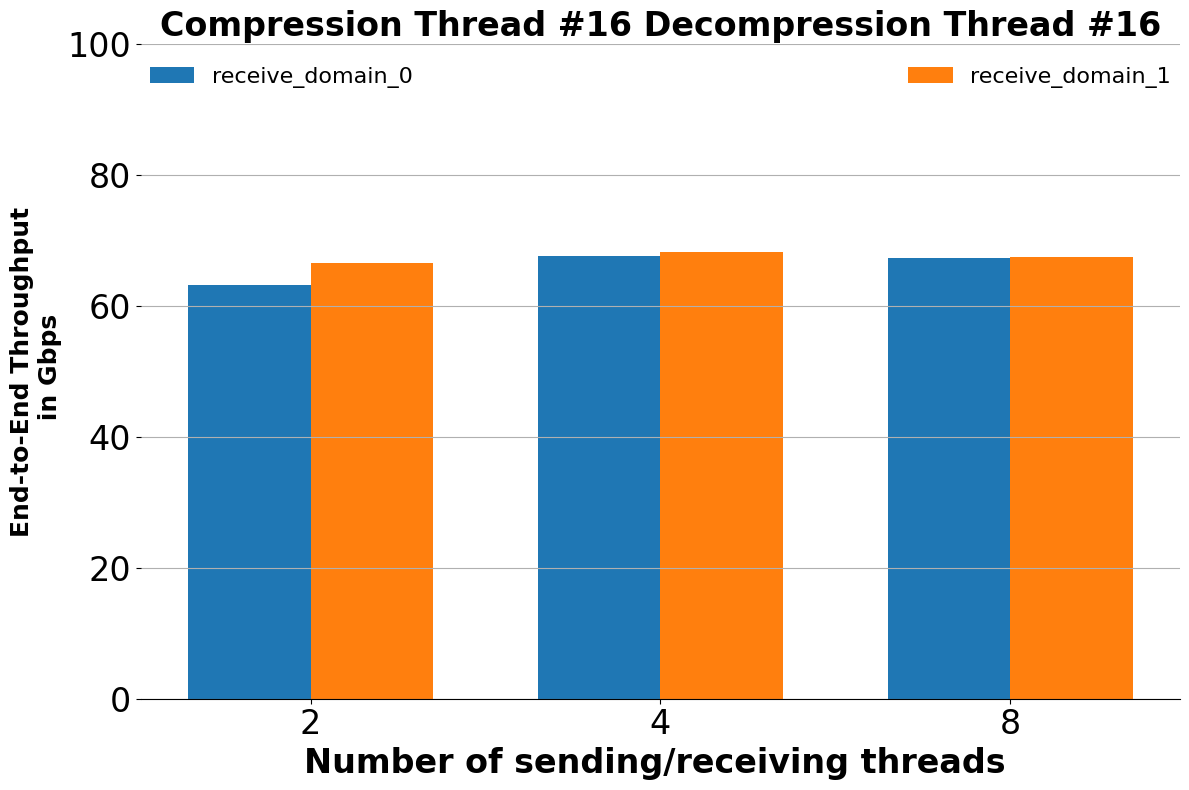

In [96]:
TARGET_COMPRESSION=16
TARGET_DECOMPRESSION=16

selection_filter='compression_'+str(TARGET_COMPRESSION)+"_decompression_"+str(TARGET_DECOMPRESSION)+"_*"
print(selection_filter)
titleName='Compression Thread #'+str(TARGET_COMPRESSION)+" Decompression Thread #"+str(TARGET_DECOMPRESSION)
# selection_filter='compression_'
parent_directory = "/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/End_to_End/"
matching_dirs = find_matching_directories(parent_directory, selection_filter)
# print(matching_dirs)
result_dict1={}
log_file_pattern="_7080*"
for dir_path in matching_dirs:
    tcp_stream,receiver_domain=find_send_receive_number_and_receiver_domain(dir_path)
    key_name="c_"+str(TARGET_COMPRESSION)+"_d_"+str(TARGET_DECOMPRESSION)+"_N_"+str(tcp_stream)+"_domain_"+str(receiver_domain)
    result_dict1[key_name]=throughput_reader(dir_path,log_file_pattern)
print(result_dict1)
plot_dictionary(result_dict1,titleName,TARGET_COMPRESSION,TARGET_DECOMPRESSION)

compression_16_decompression_8_*
{'c_16_d_8_N_2_domain_0': (31.066886, 62.9400892), 'c_16_d_8_N_2_domain_1': (32.866716600000004, 67.851092), 'c_16_d_8_N_4_domain_0': (32.66261039999999, 67.28537220000001), 'c_16_d_8_N_4_domain_1': (32.7257072, 67.47830379999999), 'c_16_d_8_N_8_domain_0': (32.451039, 66.6591594), 'c_16_d_8_N_8_domain_1': (32.4375612, 66.65874039999999)}


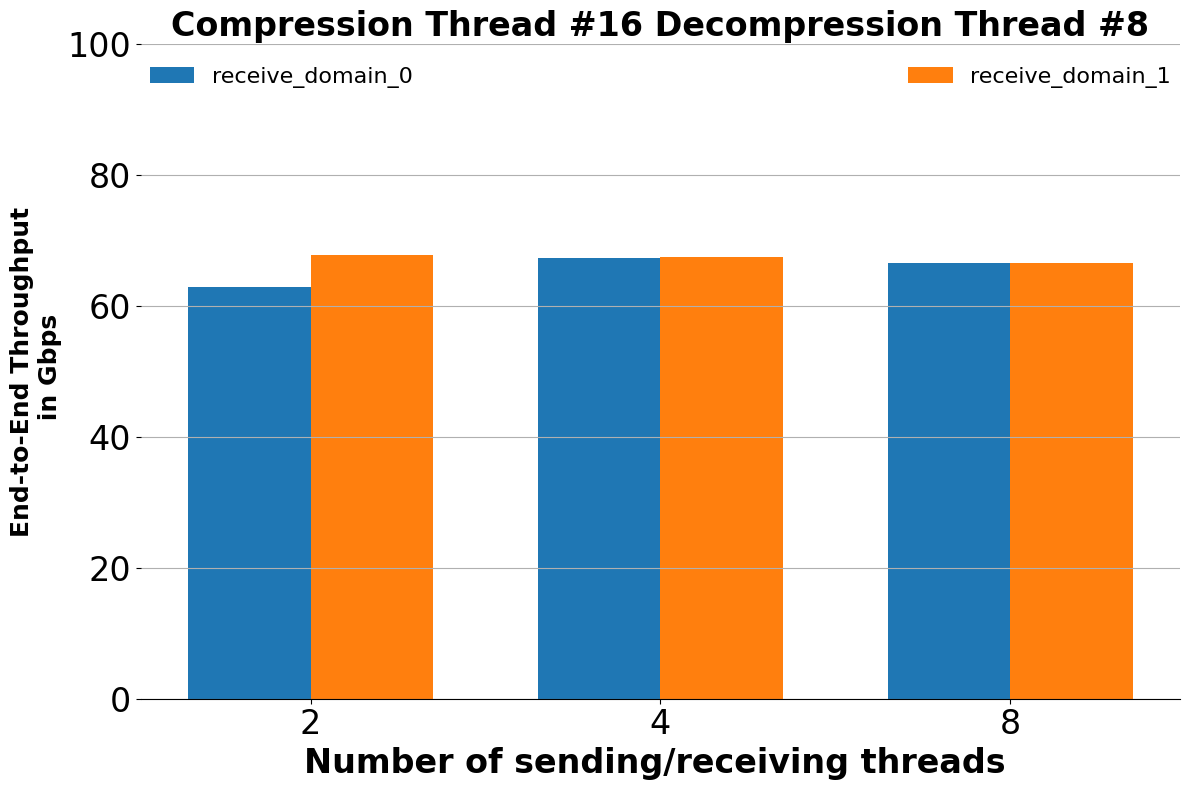

In [97]:
TARGET_COMPRESSION=16
TARGET_DECOMPRESSION=8

selection_filter='compression_'+str(TARGET_COMPRESSION)+"_decompression_"+str(TARGET_DECOMPRESSION)+"_*"
print(selection_filter)
titleName='Compression Thread #'+str(TARGET_COMPRESSION)+" Decompression Thread #"+str(TARGET_DECOMPRESSION)
# selection_filter='compression_'
parent_directory = "/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/End_to_End/"
matching_dirs = find_matching_directories(parent_directory, selection_filter)
# print(matching_dirs)
result_dict1={}
log_file_pattern="_8080*"
for dir_path in matching_dirs:
    tcp_stream,receiver_domain=find_send_receive_number_and_receiver_domain(dir_path)
    key_name="c_"+str(TARGET_COMPRESSION)+"_d_"+str(TARGET_DECOMPRESSION)+"_N_"+str(tcp_stream)+"_domain_"+str(receiver_domain)
    result_dict1[key_name]=throughput_reader(dir_path,log_file_pattern)
print(result_dict1)
plot_dictionary(result_dict1,titleName,TARGET_COMPRESSION,TARGET_DECOMPRESSION)

compression_8_decompression_8_*
{'c_8_d_8_N_2_domain_0': (18.248786600000003, 37.673975), 'c_8_d_8_N_2_domain_1': (18.259342800000002, 37.690702), 'c_8_d_8_N_4_domain_0': (18.156214799999997, 37.447692), 'c_8_d_8_N_4_domain_1': (18.155371, 37.4358084), 'c_8_d_8_N_8_domain_0': (18.0971212, 37.275592800000005), 'c_8_d_8_N_8_domain_1': (18.149026600000003, 37.417801399999995)}


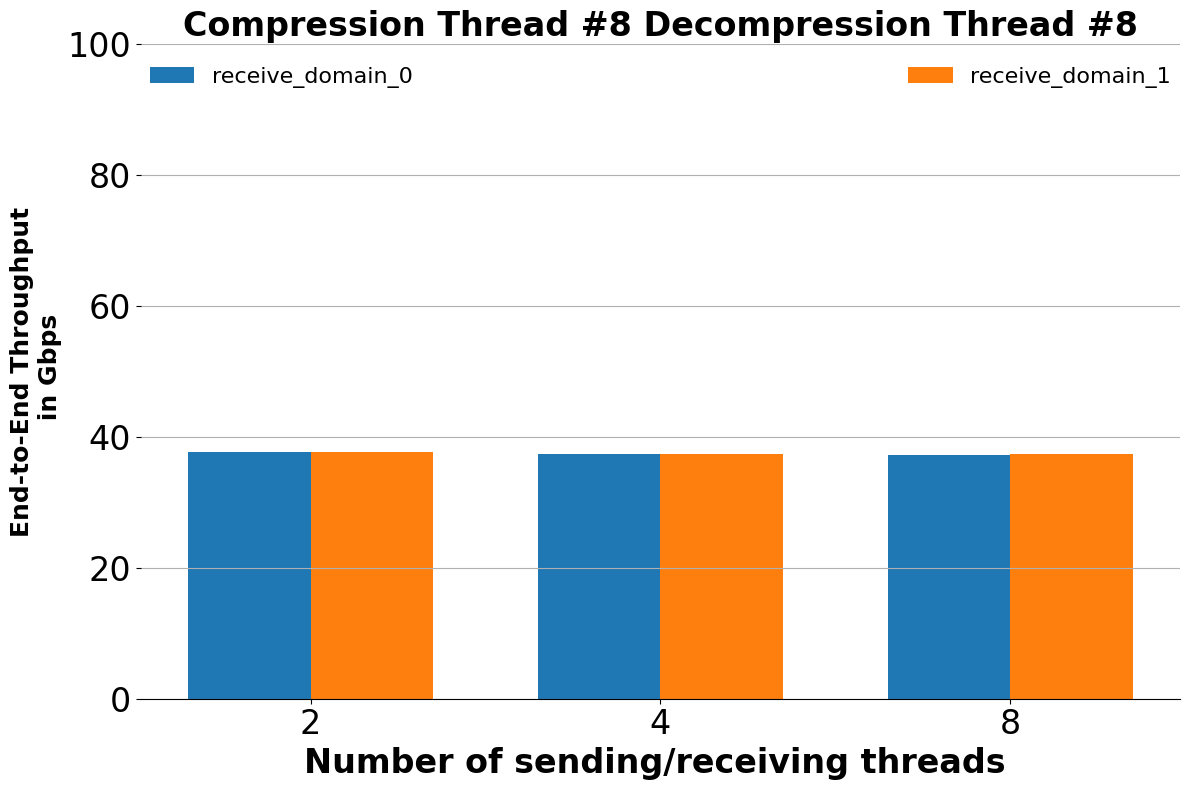

In [98]:
TARGET_COMPRESSION=8
TARGET_DECOMPRESSION=8

selection_filter='compression_'+str(TARGET_COMPRESSION)+"_decompression_"+str(TARGET_DECOMPRESSION)+"_*"
print(selection_filter)
titleName='Compression Thread #'+str(TARGET_COMPRESSION)+" Decompression Thread #"+str(TARGET_DECOMPRESSION)
# selection_filter='compression_'
parent_directory = "/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/End_to_End/"
matching_dirs = find_matching_directories(parent_directory, selection_filter)
# print(matching_dirs)
result_dict1={}
log_file_pattern="_7080*"
for dir_path in matching_dirs:
    tcp_stream,receiver_domain=find_send_receive_number_and_receiver_domain(dir_path)
    key_name="c_"+str(TARGET_COMPRESSION)+"_d_"+str(TARGET_DECOMPRESSION)+"_N_"+str(tcp_stream)+"_domain_"+str(receiver_domain)
    result_dict1[key_name]=throughput_reader(dir_path,log_file_pattern)
print(result_dict1)
plot_dictionary(result_dict1,titleName,TARGET_COMPRESSION,TARGET_DECOMPRESSION)

compression_32_decompression_8_*
{'c_32_d_8_N_2_domain_0': (25.1054516, 51.71855519999999), 'c_32_d_8_N_2_domain_1': (26.7081334, 54.983513800000004), 'c_32_d_8_N_4_domain_0': (23.8855548, 49.0186694), 'c_32_d_8_N_4_domain_1': (26.266773999999998, 53.7708798), 'c_32_d_8_N_8_domain_0': (35.5365822, 71.74748400000001), 'c_32_d_8_N_8_domain_1': (40.1128366, 82.435802)}


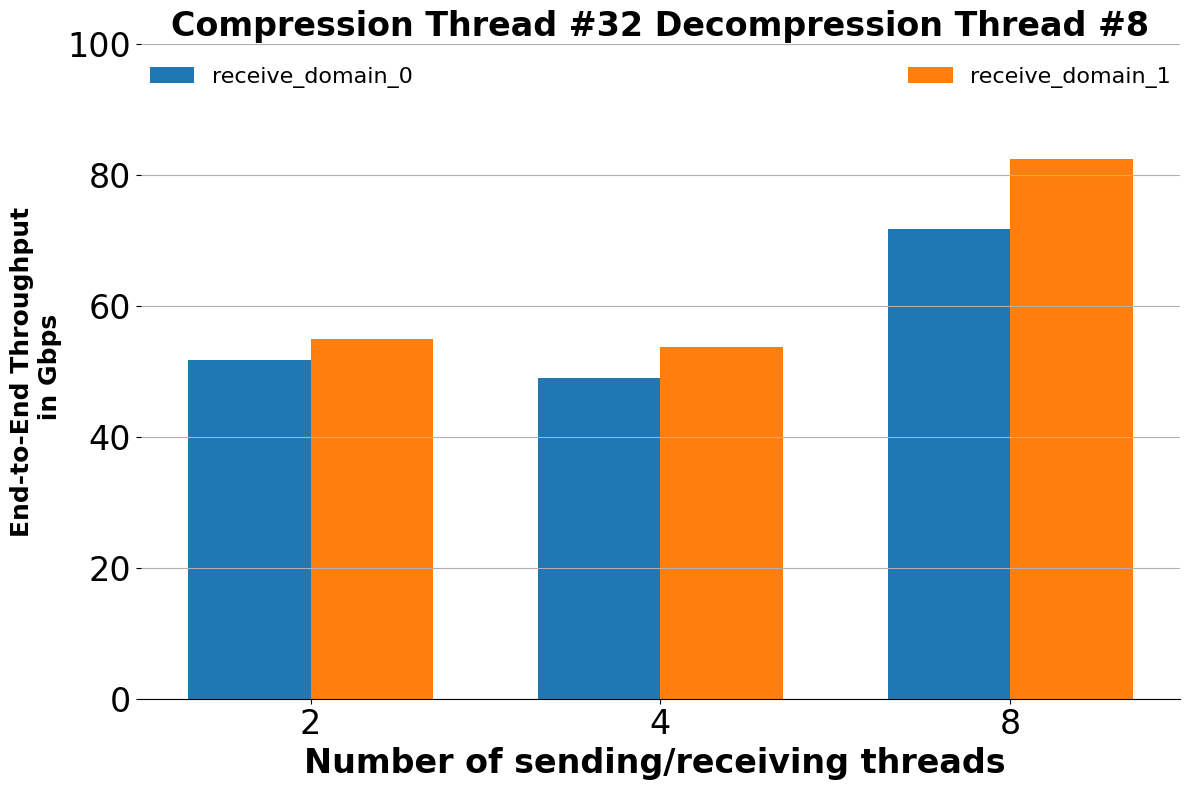

In [100]:
TARGET_COMPRESSION=32
TARGET_DECOMPRESSION=8

selection_filter='compression_'+str(TARGET_COMPRESSION)+"_decompression_"+str(TARGET_DECOMPRESSION)+"_*"
print(selection_filter)
titleName='Compression Thread #'+str(TARGET_COMPRESSION)+" Decompression Thread #"+str(TARGET_DECOMPRESSION)
# selection_filter='compression_'
parent_directory = "/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/End_to_End/"
matching_dirs = find_matching_directories(parent_directory, selection_filter)
# print(matching_dirs)
result_dict1={}
log_file_pattern="_8080*"
for dir_path in matching_dirs:
    tcp_stream,receiver_domain=find_send_receive_number_and_receiver_domain(dir_path)
    key_name="c_"+str(TARGET_COMPRESSION)+"_d_"+str(TARGET_DECOMPRESSION)+"_N_"+str(tcp_stream)+"_domain_"+str(receiver_domain)
    result_dict1[key_name]=throughput_reader(dir_path,log_file_pattern)
print(result_dict1)
plot_dictionary(result_dict1,titleName,TARGET_COMPRESSION,TARGET_DECOMPRESSION)

compression_32_decompression_16_*
{'c_32_d_16_N_2_domain_0': (25.139107799999998, 51.8074892), 'c_32_d_16_N_2_domain_1': (26.132402000000003, 53.5635906), 'c_32_d_16_N_4_domain_0': (24.6702696, 50.823193200000006), 'c_32_d_16_N_4_domain_1': (25.058925799999997, 51.5883658), 'c_32_d_16_N_8_domain_0': (34.44635699999999, 70.116792), 'c_32_d_16_N_8_domain_1': (40.1634382, 82.60993260000001)}


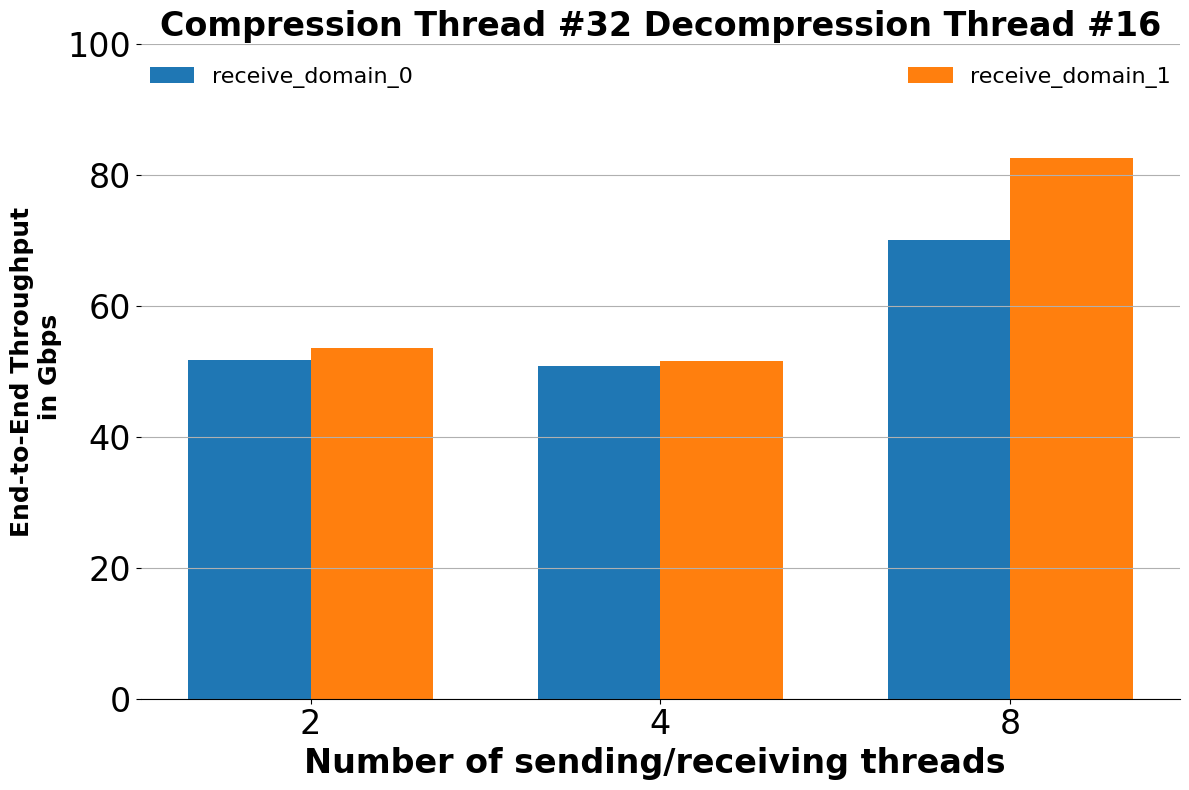

In [101]:
TARGET_COMPRESSION=32
TARGET_DECOMPRESSION=16

selection_filter='compression_'+str(TARGET_COMPRESSION)+"_decompression_"+str(TARGET_DECOMPRESSION)+"_*"
print(selection_filter)
titleName='Compression Thread #'+str(TARGET_COMPRESSION)+" Decompression Thread #"+str(TARGET_DECOMPRESSION)
# selection_filter='compression_'
parent_directory = "/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/End_to_End/"
matching_dirs = find_matching_directories(parent_directory, selection_filter)
# print(matching_dirs)
result_dict1={}
log_file_pattern="_8080*"
for dir_path in matching_dirs:
    tcp_stream,receiver_domain=find_send_receive_number_and_receiver_domain(dir_path)
    key_name="c_"+str(TARGET_COMPRESSION)+"_d_"+str(TARGET_DECOMPRESSION)+"_N_"+str(tcp_stream)+"_domain_"+str(receiver_domain)
    result_dict1[key_name]=throughput_reader(dir_path,log_file_pattern)
print(result_dict1)
plot_dictionary(result_dict1,titleName,TARGET_COMPRESSION,TARGET_DECOMPRESSION)

compression_32_decompression_4_*
{'c_32_d_4_N_2_domain_0': (25.0165732, 51.332088), 'c_32_d_4_N_2_domain_1': (24.402887600000003, 50.3304356), 'c_32_d_4_N_4_domain_0': (24.375866400000003, 50.107264), 'c_32_d_4_N_4_domain_1': (24.265247, 49.818780600000004), 'c_32_d_4_N_8_domain_0': (33.5279422, 68.56805080000001), 'c_32_d_4_N_8_domain_1': (35.084608200000005, 72.180846)}


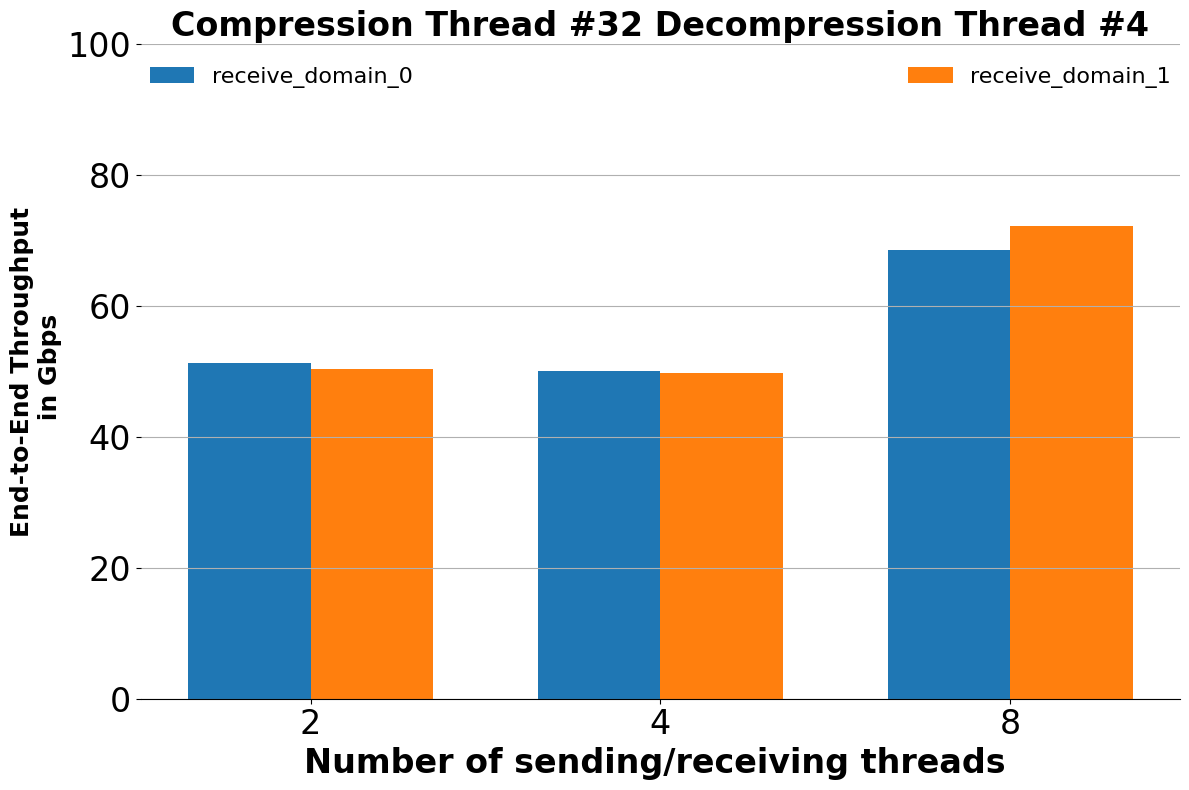

In [102]:
TARGET_COMPRESSION=32
TARGET_DECOMPRESSION=4

selection_filter='compression_'+str(TARGET_COMPRESSION)+"_decompression_"+str(TARGET_DECOMPRESSION)+"_*"
print(selection_filter)
titleName='Compression Thread #'+str(TARGET_COMPRESSION)+" Decompression Thread #"+str(TARGET_DECOMPRESSION)
# selection_filter='compression_'
parent_directory = "/home/beams/MJAMIL/hpdt4ha/tests/perf_tools/logs/End_to_End/"
matching_dirs = find_matching_directories(parent_directory, selection_filter)
# print(matching_dirs)
result_dict1={}
log_file_pattern="_8080*"
for dir_path in matching_dirs:
    tcp_stream,receiver_domain=find_send_receive_number_and_receiver_domain(dir_path)
    key_name="c_"+str(TARGET_COMPRESSION)+"_d_"+str(TARGET_DECOMPRESSION)+"_N_"+str(tcp_stream)+"_domain_"+str(receiver_domain)
    result_dict1[key_name]=throughput_reader(dir_path,log_file_pattern)
print(result_dict1)
plot_dictionary(result_dict1,titleName,TARGET_COMPRESSION,TARGET_DECOMPRESSION)